In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import os
import csv

In [58]:
class XRayDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __get__(self, index):
        return self.features[index], self.labels[index]

In [59]:
frontal_img_dim = (2400, 2000)

train_data_frontal = np.array([])

train_path = os.path.abspath("train")
for pid in os.listdir(os.path.abspath("train")):
    if not os.path.isfile(os.path.join(os.path.abspath("train"), pid)):
        pid_path = train_path + "\\" + pid
        for study in os.listdir(pid_path):
            study_path = pid_path + "\\" + study
            for image_file in os.listdir(study_path):
                if image_file[6:13] == "frontal":
                    image_file_path = study_path + "\\" + image_file
                    image = Image.open(image_file_path)
                    
                    frontal_img_dim
                    image = image.resize(frontal_img_dim)
                    image_data = np.asarray(image)
                    np.append(train_data_frontal, image_data)

In [60]:
def symmetry_value():
    

SyntaxError: incomplete input (2649991654.py, line 2)

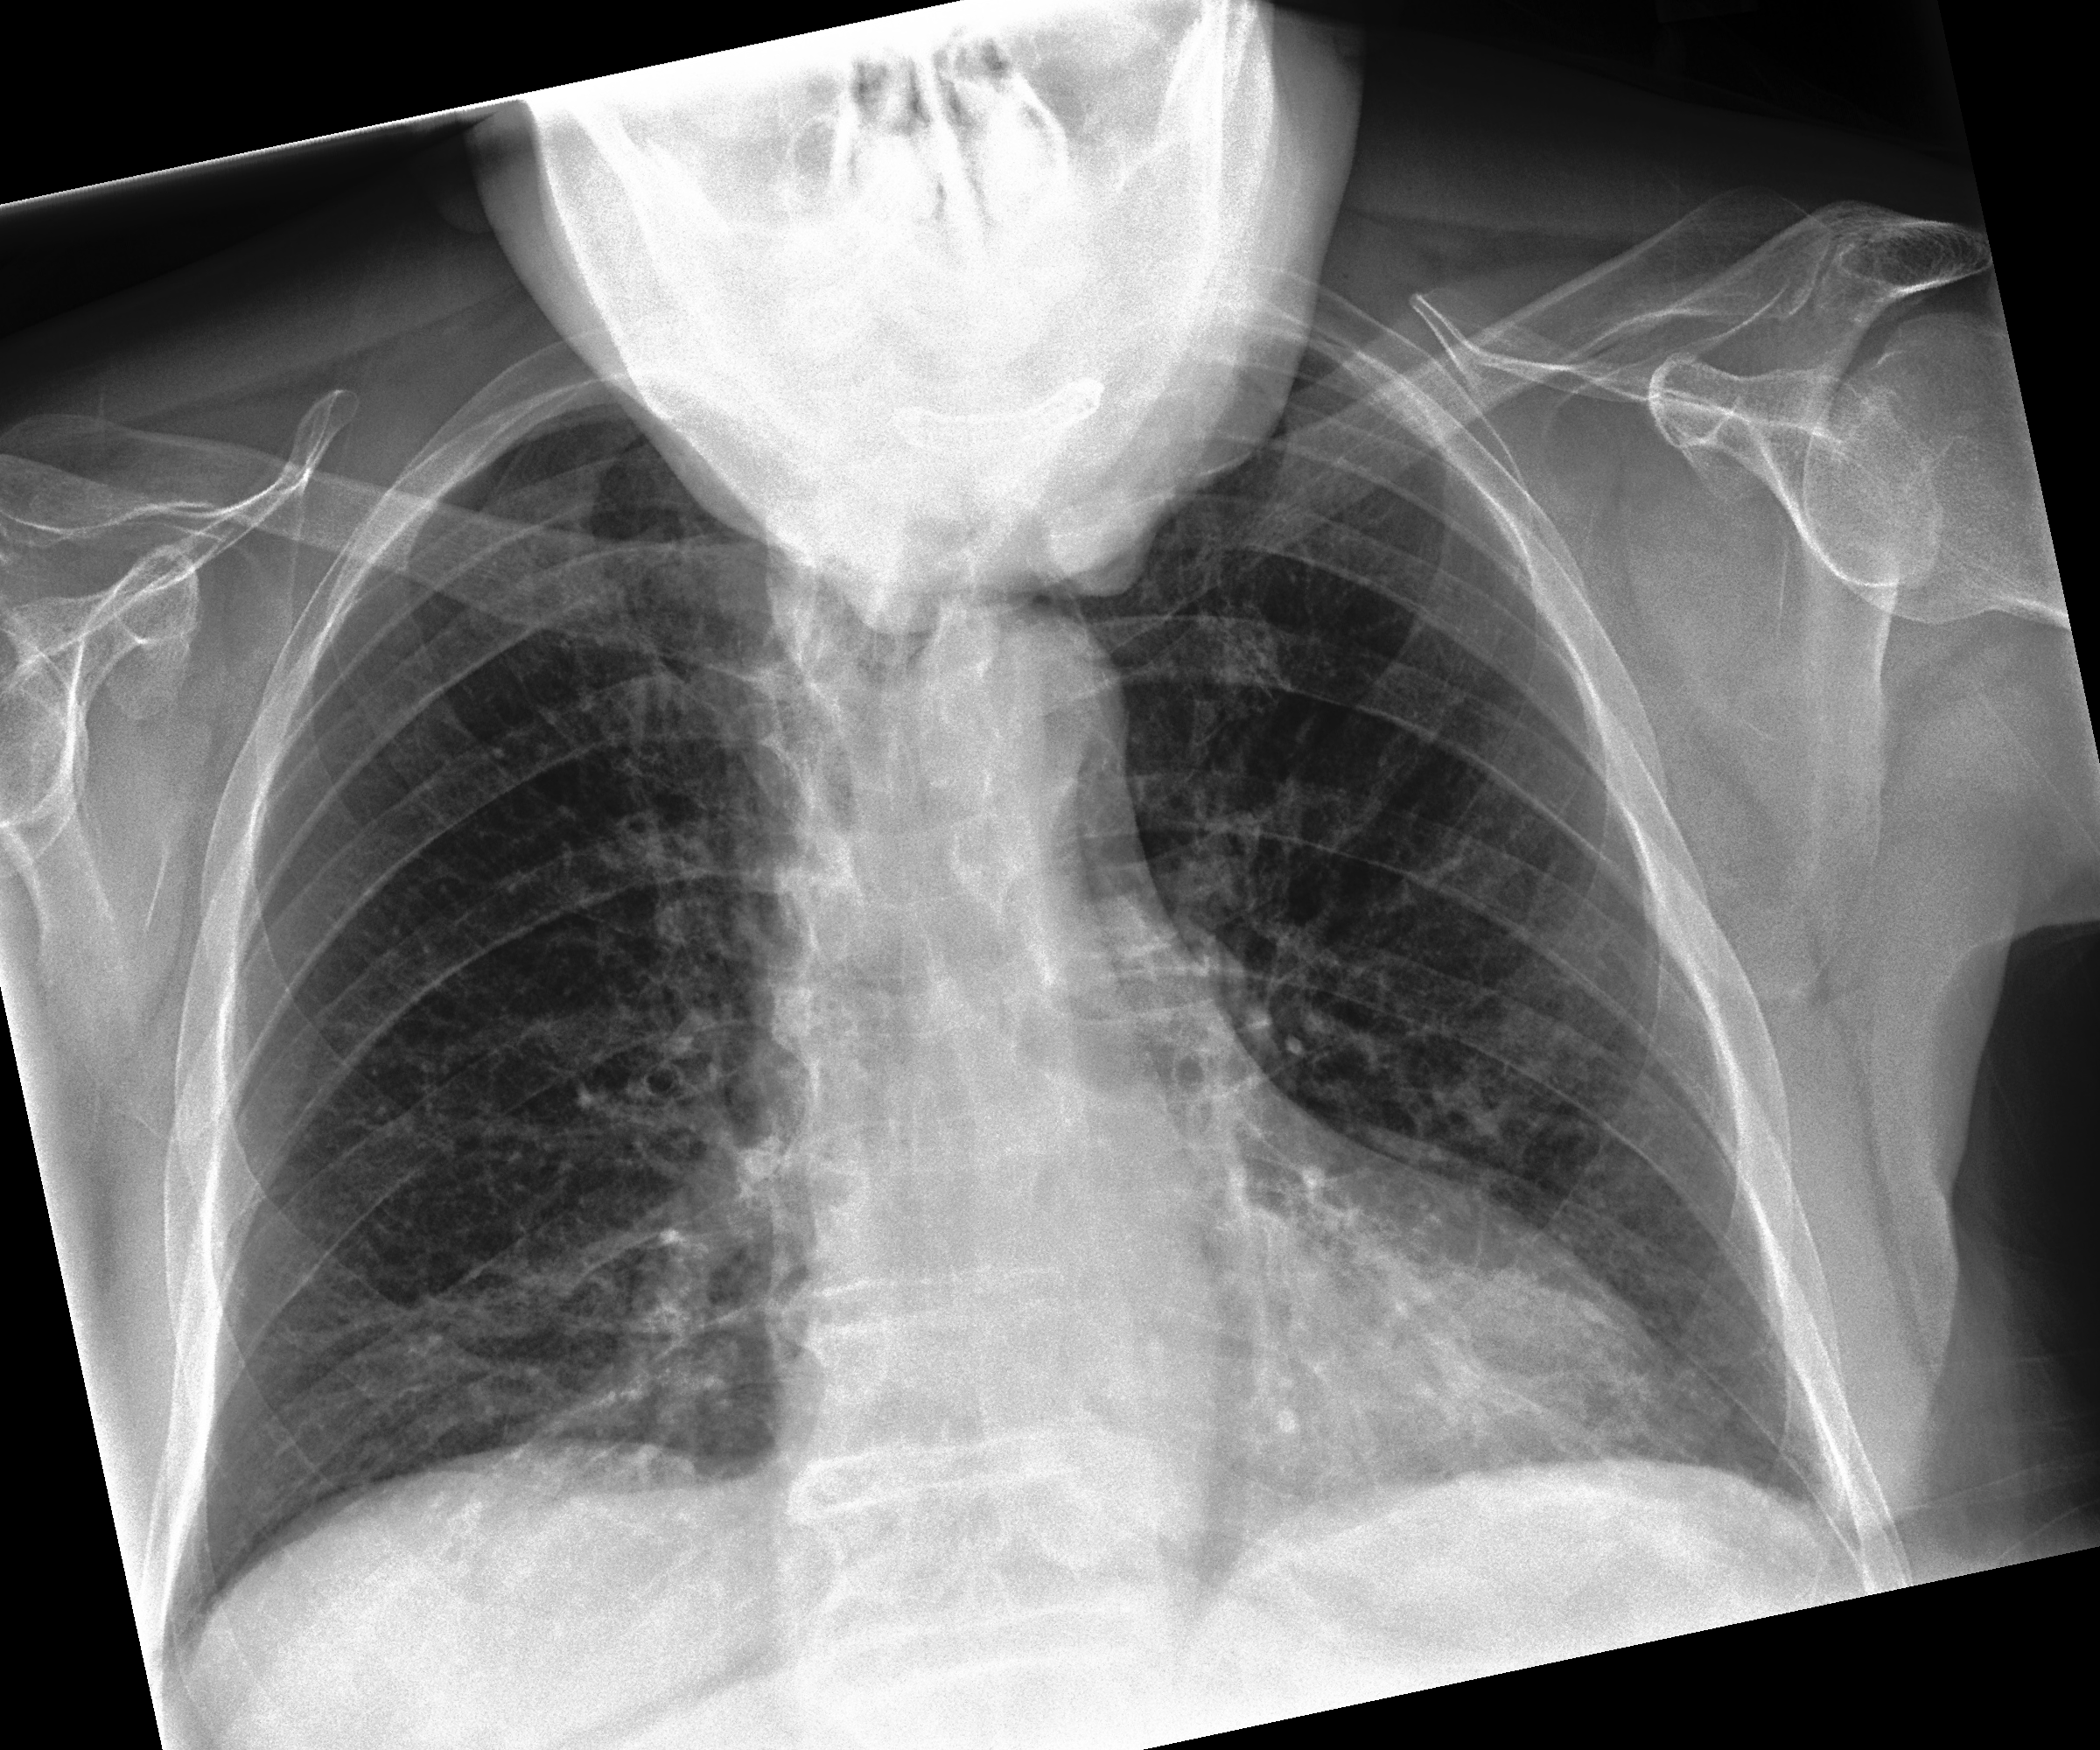

In [ ]:
image.rotate(12)

In [ ]:
deg = 12
image.size[0]
image.rotate(deg)
cropped_img = image.crop((1, 1, image.size[0], image.size[0]))
cropped_img

NameError: name 'img' is not defined

In [ ]:
df = pd.read_csv('train/train.csv', sep=',')
df

Unnamed: 0                                               Path     Sex  \
0                0            train/pid50512/study1/view1_frontal.jpg  Female   
1                1            train/pid21580/study2/view1_frontal.jpg  Female   
2                2            train/pid21580/study1/view1_frontal.jpg  Female   
3                3            train/pid21580/study1/view2_lateral.jpg  Female   
4                4            train/pid33839/study1/view1_frontal.jpg    Male   
...            ...                                                ...     ...   
178153      223409            train/pid16708/study2/view1_frontal.jpg    Male   
178154      223410            train/pid16708/study1/view1_frontal.jpg    Male   
178155      223411            train/pid32381/study1/view1_frontal.jpg  Female   
178156      223412            train/pid25865/study1/view1_frontal.jpg  Female   
178157      223413  CheXpert-v1.0/train/patient64540/study1/view1_...  Female   

        Age Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  \
0        68         Frontal    AP         1.0                         NaN   
1        87         Frontal    AP         NaN                         NaN   
2        83         Frontal    AP         NaN                         NaN   
3        83         Lateral   NaN         NaN                         NaN   
4        41         Frontal    AP         NaN                         NaN   
...     ...             ...   ...         ...                         ...   
178153   59         Frontal    AP         NaN                         NaN   
178154   59         Frontal    AP         NaN                         NaN   
178155    0         Frontal    AP         NaN                         NaN   
178156    0         Frontal    AP         NaN                         NaN   
178157    0         Frontal    AP         1.0                         NaN   

        Cardiomegaly  Lung Opacity  Lung Lesion  Edema  Consolidation  \
0                NaN           NaN          NaN    NaN            NaN   
1                0.0           1.0          NaN    0.0            0.0   
2                NaN           1.0          NaN    NaN            0.0   
3                NaN           1.0          NaN    NaN            0.0   
4                NaN           NaN          NaN    1.0            NaN   
...              ...           ...          ...    ...            ...   
178153           NaN           0.0          NaN    NaN            NaN   
178154           NaN           0.0          NaN    NaN            NaN   
178155           NaN           NaN          NaN    0.0            NaN   
178156           1.0           1.0          NaN    NaN            NaN   
178157           NaN           NaN          NaN    NaN            NaN   

        Pneumonia  Atelectasis  Pneumothorax  Pleural Effusion  Pleural Other  \
0             NaN          NaN          -1.0               NaN            NaN   
1             NaN          0.0           NaN               0.0            NaN   
2             NaN          NaN           NaN               NaN            NaN   
3             NaN          NaN           NaN               NaN            NaN   
4             NaN          NaN          -1.0               NaN            NaN   
...           ...          ...           ...               ...            ...   
178153        NaN          0.0          -1.0               1.0            NaN   
178154       -1.0          0.0           NaN               0.0            NaN   
178155        NaN          NaN           NaN               NaN            NaN   
178156        0.0          1.0          -1.0               NaN            NaN   
178157        NaN          NaN          -1.0               NaN            NaN   

        Fracture  Support Devices  
0            NaN              1.0  
1            1.0              NaN  
2            1.0              NaN  
3            1.0              NaN  
4            NaN              NaN  
...          ...              ...  
178153  

In [ ]:
batch_size = 200
train_dataset = XRayDataset(train_data, train_label)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# set batch size
batch_size = 32

# load training data downloaded into data/ folder
mnist_training_data = torchvision.datasets.MNIST('data/', train=True, download=True,
                                                transform=transforms.ToTensor())
# transforms.ToTensor() converts batch of images to 4-D tensor and normalizes 0-255 to 0-1.0
training_data_loader = torch.utils.data.DataLoader(mnist_training_data,
                                                  batch_size=batch_size,
                                                  shuffle=True)

# load test data
mnist_test_data = torchvision.datasets.MNIST('data/', train=False, download=True,
                                                transform=transforms.ToTensor())
test_data_loader = torch.utils.data.DataLoader(mnist_test_data,
                                                  batch_size=batch_size,
                                                  shuffle=False)

In [ ]:
# look at the number of batches per epoch for training and validation
print(f'{len(training_data_loader)} training batches')
print(f'{len(training_data_loader) * batch_size} training samples')
print(f'{len(test_data_loader)} validation batches')

In [ ]:
# sample model
import torch.nn as nn

model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=(3,3)),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(p=0.25),

    nn.Conv2d(16, 32, kernel_size=(3,3)),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(p=0.25),

    nn.Flatten(),
    nn.Linear(25*32, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
    # PyTorch implementation of cross-entropy loss includes softmax layer
)

In [ ]:
# why don't we take a look at the shape of the weights for each layer
for p in model.parameters():
    print(p.data.shape)

In [ ]:
# our model has some # of parameters:
count = 0
for p in model.parameters():
    n_params = np.prod(list(p.data.shape)).item()
    count += n_params
print(f'total params: {count}')

In [ ]:
# For a multi-class classification problem
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters())

In [ ]:
# Train the model for 10 epochs, iterating on the data in batches
n_epochs = 10

# store metrics
training_accuracy_history = np.zeros([n_epochs, 1])
training_loss_history = np.zeros([n_epochs, 1])
validation_accuracy_history = np.zeros([n_epochs, 1])
validation_loss_history = np.zeros([n_epochs, 1])

for epoch in range(n_epochs):
    print(f'Epoch {epoch+1}/10:', end='')
    train_total = 0
    train_correct = 0
    # train
    model.train()
    for i, data in enumerate(training_data_loader):
        images, labels = data
        optimizer.zero_grad()
        # forward pass
        output = model(images)
        # calculate categorical cross entropy loss
        loss = criterion(output, labels)
        # backward pass
        loss.backward()
        optimizer.step()

        # track training accuracy
        _, predicted = torch.max(output.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        # track training loss
        training_loss_history[epoch] += loss.item()
        # progress update after 180 batches (~1/10 epoch for batch size 32)
        if i % 180 == 0: print('.',end='')
    training_loss_history[epoch] /= len(training_data_loader)
    training_accuracy_history[epoch] = train_correct / train_total
    print(f'\n\tloss: {training_loss_history[epoch,0]:0.4f}, acc: {training_accuracy_history[epoch,0]:0.4f}',end='')

    # validate
    test_total = 0
    test_correct = 0
    with torch.no_grad():
        model.eval()
        for i, data in enumerate(test_data_loader):
            images, labels = data
            # forward pass
            output = model(images)
            # find accuracy
            _, predicted = torch.max(output.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            # find loss
            loss = criterion(output, labels)
            validation_loss_history[epoch] += loss.item()
        validation_loss_history[epoch] /= len(test_data_loader)
        validation_accuracy_history[epoch] = test_correct / test_total
    print(f', val loss: {validation_loss_history[epoch,0]:0.4f}, val acc: {validation_accuracy_history[epoch,0]:0.4f}')